# Validation of Cowden_clay soil model

The Cowden clay is documented in a paper from Byrne et al (2020). 
A model in OpenPile is created below reflecting the piles D1 and D2 in the paper

**References**

[1] Byrne, B. W., Houlsby, G. T., Burd, H. J., Gavin, K. G., Igoe, D. J. P., Jardine, R. J., Martin, C. M., McAdam, R. A.,   
    Potts, D. M., Taborda, D. M. G. & Zdravkovic ́, L. (2020). PISA design model for monopiles for offshore wind turbines: application to a stiff glacial clay till. Géotechnique, https://doi.org/10.1680/ jgeot.18.P.255.

/Users/guillaumemelin/Desktop/svc/openpile/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning: 
The method Analyze.simple_winkler_analysis() will be removed in version 1.0.0.
Please use the Analyze.winkler() instead.


Converged at iteration no. 1
Converged at iteration no. 4
Converged at iteration no. 5
Converged at iteration no. 4
Converged at iteration no. 5
Converged at iteration no. 5
Converged at iteration no. 6
Converged at iteration no. 6
Converged at iteration no. 6
Converged at iteration no. 5
Converged at iteration no. 5
Converged at iteration no. 6
Converged at iteration no. 7
Converged at iteration no. 8
Converged at iteration no. 21
Converged at iteration no. 1


/Users/guillaumemelin/Desktop/svc/openpile/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:66: DeprecationWarning: 
The method Analyze.simple_winkler_analysis() will be removed in version 1.0.0.
Please use the Analyze.winkler() instead.


Converged at iteration no. 5
Converged at iteration no. 5
Converged at iteration no. 5
Converged at iteration no. 4
Converged at iteration no. 5
Converged at iteration no. 5
Converged at iteration no. 5
Converged at iteration no. 6
Converged at iteration no. 6
Converged at iteration no. 6
Converged at iteration no. 7
Converged at iteration no. 6
Converged at iteration no. 7
Converged at iteration no. 9


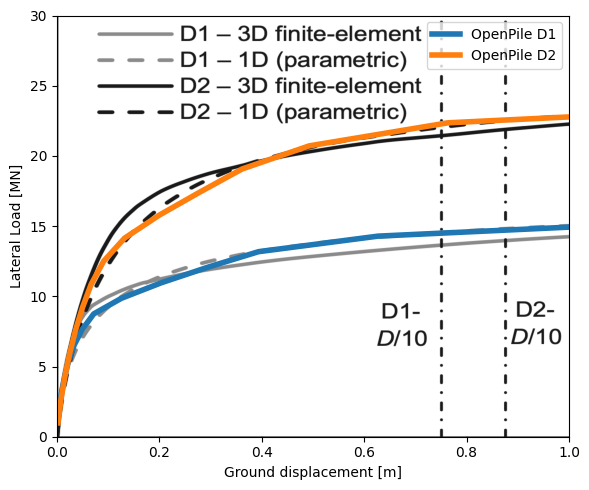

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Cowden_clay
from openpile.analyze import simple_winkler_analysis

# Plot with piles D1 and D2
fig, ax = plt.subplots(figsize=[6, 5])
im = plt.imread("Cowden_Clay_D1_and_D2_piles.png")
im = ax.imshow(im, extent=[0, 1, 0, 30], aspect="auto")
ax.set_xlim([0, 1])
ax.set_xlabel("Ground displacement [m]")
ax.set_ylabel("Lateral Load [MN]")

# Pile D1
pile = Pile.create_tubular(name="", top_elevation=0, bottom_elevation=-22.5, diameter=7.5, wt=0.068)
sp = SoilProfile(
    name="",
    top_elevation=0,
    water_line=10,
    layers=[
        Layer(
            name="",
            top=0,
            bottom=-11,
            weight=21,
            lateral_model=Cowden_clay(Su=[80, 140], G0=[20e3, 200e3]),
        ),
        Layer(
            name="",
            top=-11,
            bottom=-35,
            weight=21,
            lateral_model=Cowden_clay(Su=[140, 200], G0=[200e3, 400e3]),
        ),
    ],
)

M = Model(name="", pile=pile, soil=sp, coarseness=1.0)
M.set_support(elevation=-22.5, Tx=True)

vg = []
applied_loads = np.linspace(1, 16.5, 15)
e = 37.5

for Hg in applied_loads:
    M.set_pointload(elevation=0, Py=Hg * 1e3, Mz=-Hg * 1e3 * e)
    result = simple_winkler_analysis(M)

    vg.append(result.deflection["Deflection [m]"][0])

ax.plot(vg, applied_loads, linewidth=4)

# Pile D2
pile = Pile.create_tubular(name="", top_elevation=0, bottom_elevation=-35, diameter=8.75, wt=0.091)
M = Model(name="", pile=pile, soil=sp, coarseness=1.0)
M.set_support(elevation=-35, Tx=True)

vg = []
applied_loads = np.linspace(1, 24, 15)
e = 87.5

for Hg in applied_loads:
    M.set_pointload(elevation=0, Py=Hg * 1e3, Mz=-Hg * 1e3 * e)
    result = simple_winkler_analysis(M)

    vg.append(result.deflection["Deflection [m]"][0])

ax.plot(vg, applied_loads, linewidth=4)
ax.legend(["OpenPile D1", "OpenPile D2"])

plt.tight_layout()
plt.savefig("../docs/source/_static/validation/CowdenClay_D1_D2.png")
